# Bibliotecas

In [1]:
import numpy  as np
import pandas as pd
import string
import warnings
%matplotlib notebook 
import matplotlib.dates as mdates
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
import matplotlib.ticker as mticker
from sklearn import preprocessing
import pandas_datareader.data as web
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
import math
from pandas.plotting import scatter_matrix
from datetime import date
import seaborn as sns
pandas.options.display.max_rows
from pandas_datareader import data
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import norm
from scipy import stats
from matplotlib import style
warnings.filterwarnings('ignore')
%matplotlib inline
# prettify the figures
plt.style.use(['seaborn-white', 'seaborn-paper'])
plt.rc('font', family='Times New Roman', size=15)
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'cm'
plt.rcParams['axes.grid'] = True
kw_save = dict(bbox_iches='tight', transparent=True)
from pandas.util.testing import assert_frame_equal

c:\users\danie\pycharmprojects\environment\venv\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# Análise de Retornos Vs Bovespa

In [2]:
# Listas de Small Caps e IBRX50

small  = ['AMAR3.SA', 'ANIM3.SA', 'ARZZ3.SA', 'BEEF3.SA', 'BIDI4.SA', 'BKBR3.SA', 'BRAP4.SA', 'BRML3.SA', 
          'BRSR6.SA', 'CAML3.SA', 'CEAB3.SA', 'CESP6.SA', 'JHSF3.SA', 'DTEX3.SA', 'BRPR3.SA', 
          'CNTO3.SA', 'COGN3.SA', 'CSMG3.SA', 'CSNA3.SA', 'CVCB3.SA', 'CYRE3.SA', 'DIRR3.SA', 'DMMO3.SA',  
          'ECOR3.SA', 'EMBR3.SA', 'ENAT3.SA', 'ENBR3.SA', 'ENEV3.SA', 'EVEN3.SA', 'EGIE3.SA', 'EZTC3.SA', 
          'FLRY3.SA', 'GFSA3.SA', 'GOAU4.SA', 'GOLL4.SA', 'GRND3.SA', 'GUAR3.SA', 'HGTX3.SA', 'IGTA3.SA',  
          'JSLG3.SA', 'LCAM3.SA', 'LEVE3.SA', 'LIGT3.SA', 'LINX3.SA', 'LOGG3.SA', 'LOGN3.SA', 'OMGE3.SA',
          'MDIA3.SA', 'MEAL3.SA', 'MILS3.SA', 'MOVI3.SA', 'MRFG3.SA', 'MRVE3.SA', 'MYPK3.SA', 'ODPV3.SA',  
          'PARD3.SA', 'POMO4.SA', 'PRIO3.SA', 'QUAL3.SA', 'RAPT4.SA', 'RLOG3.SA', 'SAPR4.SA', 'TGMA3.SA',
          'SEER3.SA', 'SLCE3.SA', 'SMLS3.SA', 'SMTO3.SA', 'SQIA3.SA', 'STBP3.SA', 'TCSA3.SA', 'TEND3.SA', 
          'TRIS3.SA', 'TUPY3.SA', 'UNIP6.SA', 'USIM5.SA', 'VIVA3.SA', 'VLID3.SA', 'VVAR3.SA', 'WIZS3.SA']

ibrx50 = ['ABEV3.SA', 'AZUL4.SA', 'BBAS3.SA', 'B3SA3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BPAC11.SA','BRDT3.SA', 'BRFS3.SA' ,'BRKM5.SA', 'BRML3.SA',
          'CCRO3.SA', 'CIEL3.SA', 'CMIG4.SA', 'COGN3.SA', 'CSNA3.SA', 'CYRE3.SA', 'BTOW3.SA', 'IRBR3.SA', 'GOLL4.SA',
          'ELET3.SA', 'EQTL3.SA', 'GGBR4.SA', 'GNDI3.SA', 'HAPV3.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'LAME4.SA', 'LREN3.SA', 
          'MGLU3.SA', 'MRFG3.SA', 'MRVE3.SA', 'MULT3.SA', 'NTCO3.SA', 'PCAR3.SA', 'PETR3.SA', 'YDUQ3.SA', 'RADL3.SA',
          'RAIL3.SA', 'RENT3.SA', 'SBSP3.SA', 'SULA11.SA','SUZB3.SA', 'UGPA3.SA', 'USIM5.SA', 'VALE3.SA', 'WEGE3.SA']

## 2019 (IBRX50)

In [3]:
# Coletando Dados de Preço 2019 (IBRX50)

stock_data = yf.download(ibrx50 , start='2018-12-28', end='2020-01-02')['Close']
bvsp_data  = yf.download('^BVSP', start='2018-12-28', end='2020-01-02')['Close']

stock_data.ffill(inplace=True)
bvsp_data.ffill(inplace=True)

[*********************100%***********************]  48 of 48 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Calculo dos Retornos

stock_returns  = np.log(stock_data).shift(-1) - np.log(stock_data)
bvsp_returns   = np.log(bvsp_data).shift(-1) - np.log(bvsp_data)
annual_returns = ((1+np.mean(stock_returns))**len(stock_data))-1
bvsp_annual    = ((1+np.mean(bvsp_returns))**len(stock_data))-1

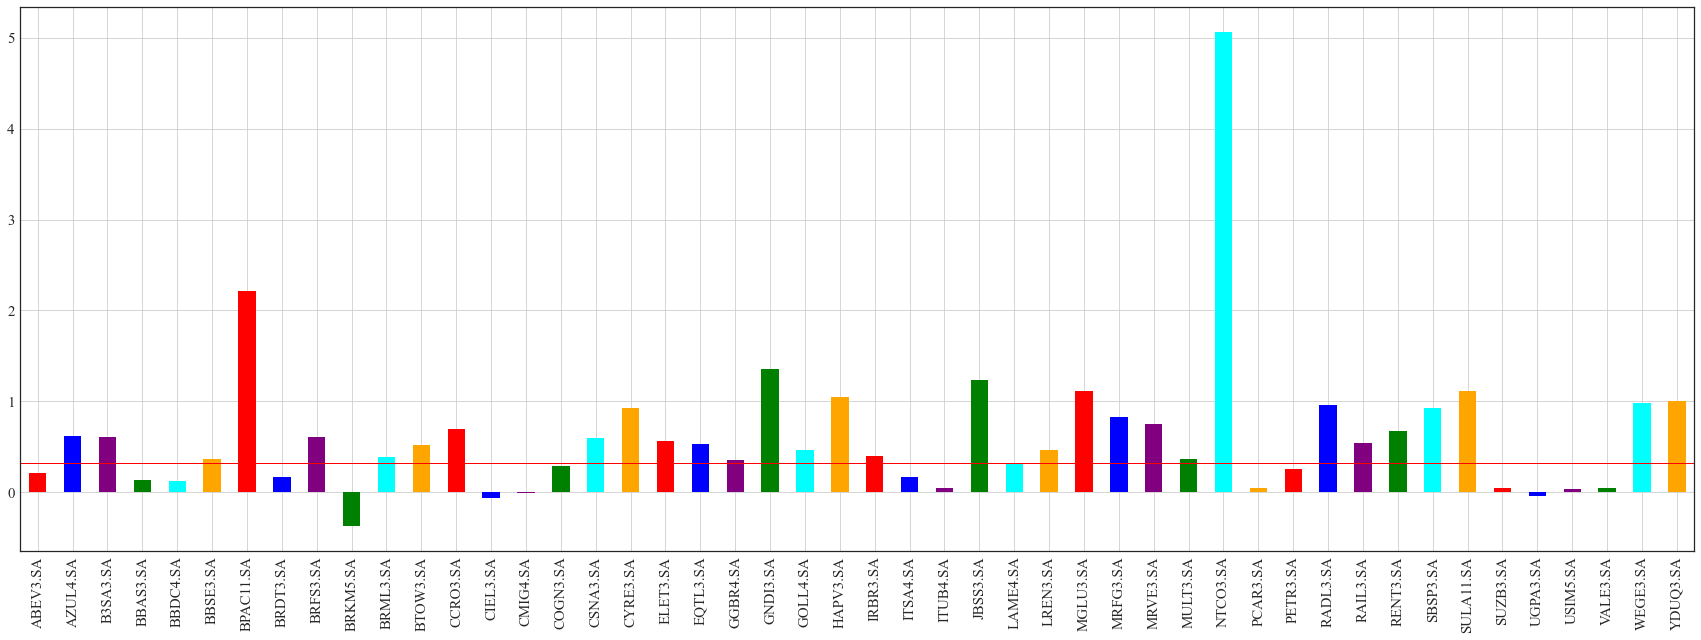

In [5]:
annual_returns.plot.bar(figsize=(30,10), color=['red','blue','purple', 'green', 'cyan', 'orange'], fontsize=15)
plt.axhline(y=bvsp_annual, color='r', linestyle='-')

In [8]:
excess_returns = annual_returns.sub(bvsp_annual)
excess_returns = excess_returns[(excess_returns > 0)]

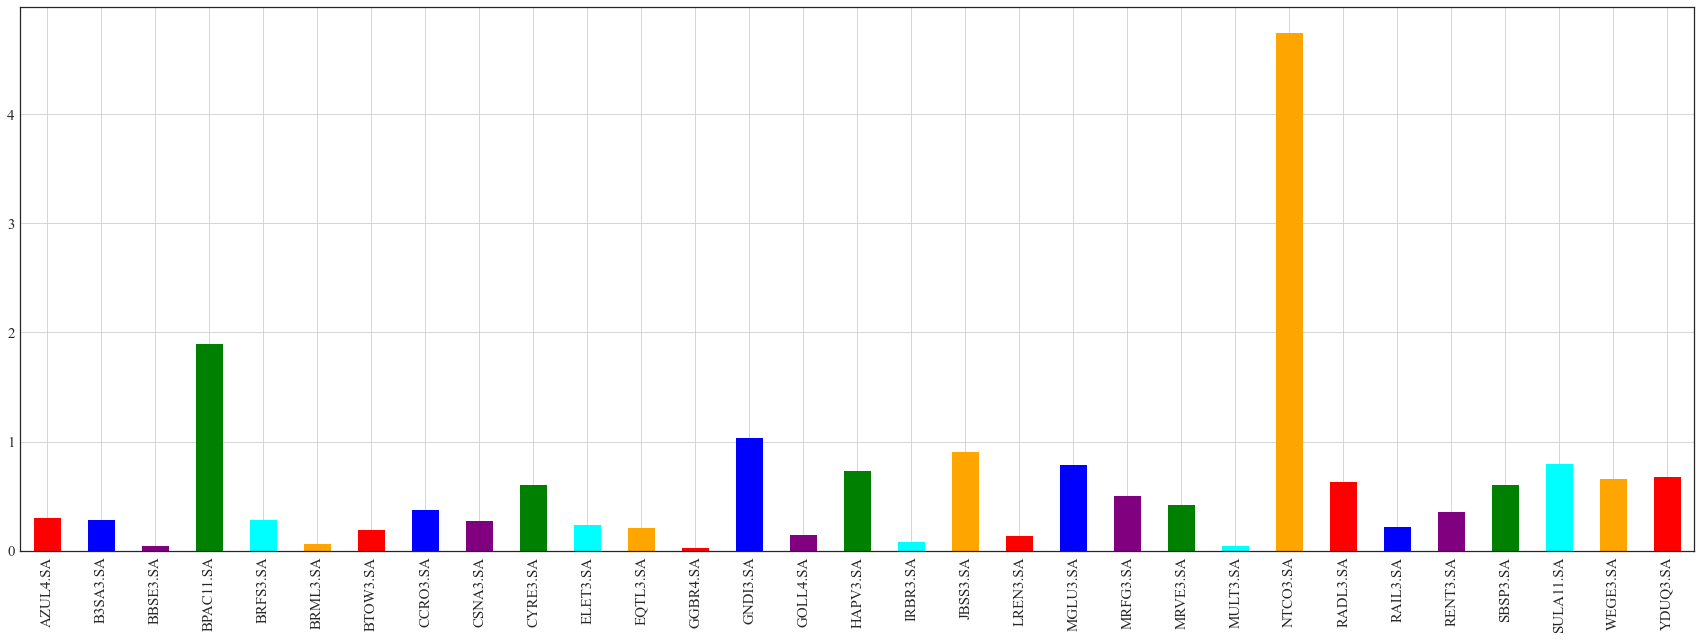

In [9]:
excess_returns.plot.bar(figsize=(30,10), color=['red','blue','purple', 'green', 'cyan', 'orange'], fontsize=15)

## 2020 (IBRX50)

In [10]:
# Coletando Dados de Preço 2019 (IBRX50)

stock_data = yf.download(ibrx50 , start='2019-12-30')['Close']
bvsp_data  = yf.download('^BVSP', start='2019-12-30')['Close']

stock_data.ffill(inplace=True)
bvsp_data.ffill(inplace=True)

[*********************100%***********************]  48 of 48 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
stock_returns  = np.log(stock_data).shift(-1) - np.log(stock_data)
bvsp_returns   = np.log(bvsp_data).shift(-1) - np.log(bvsp_data)
annual_returns = ((1+np.mean(stock_returns))**len(stock_data))-1
bvsp_annual    = ((1+np.mean(bvsp_returns))**len(stock_data))-1

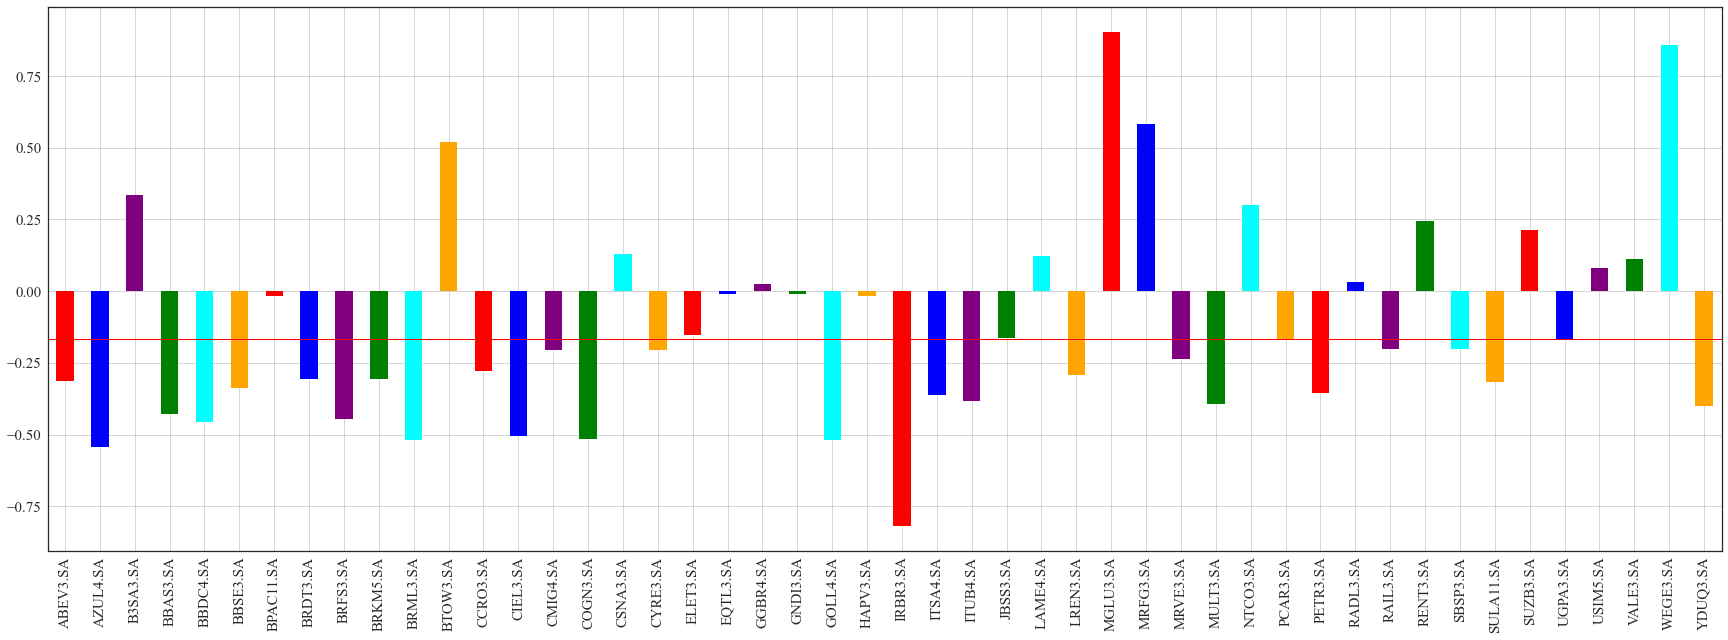

In [12]:
annual_returns.plot.bar(figsize=(30,10), color=['red','blue','purple', 'green', 'cyan', 'orange'], fontsize=15)
plt.axhline(y=bvsp_annual, color='r', linestyle='-')

## 2019 (SMALL CAPS)

In [13]:
# Coletando Dados de Preço 2019 (SMALL CAPS)

stock_data = yf.download(small  , start='2019-01-02', end='2019-12-30')['Close']
bvsp_data  = yf.download('^BVSP', start='2019-01-02', end='2019-12-30')['Close']

stock_data.ffill(inplace=True)
bvsp_data.ffill(inplace=True)

[*********************100%***********************]  79 of 79 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
# Calculo dos Retornos

stock_returns  = np.log(stock_data).shift(-1) - np.log(stock_data)
bvsp_returns   = np.log(bvsp_data).shift(-1) - np.log(bvsp_data)
annual_returns = ((1+np.mean(stock_returns))**252)-1
bvsp_annual    = ((1+np.mean(bvsp_returns))**252)-1

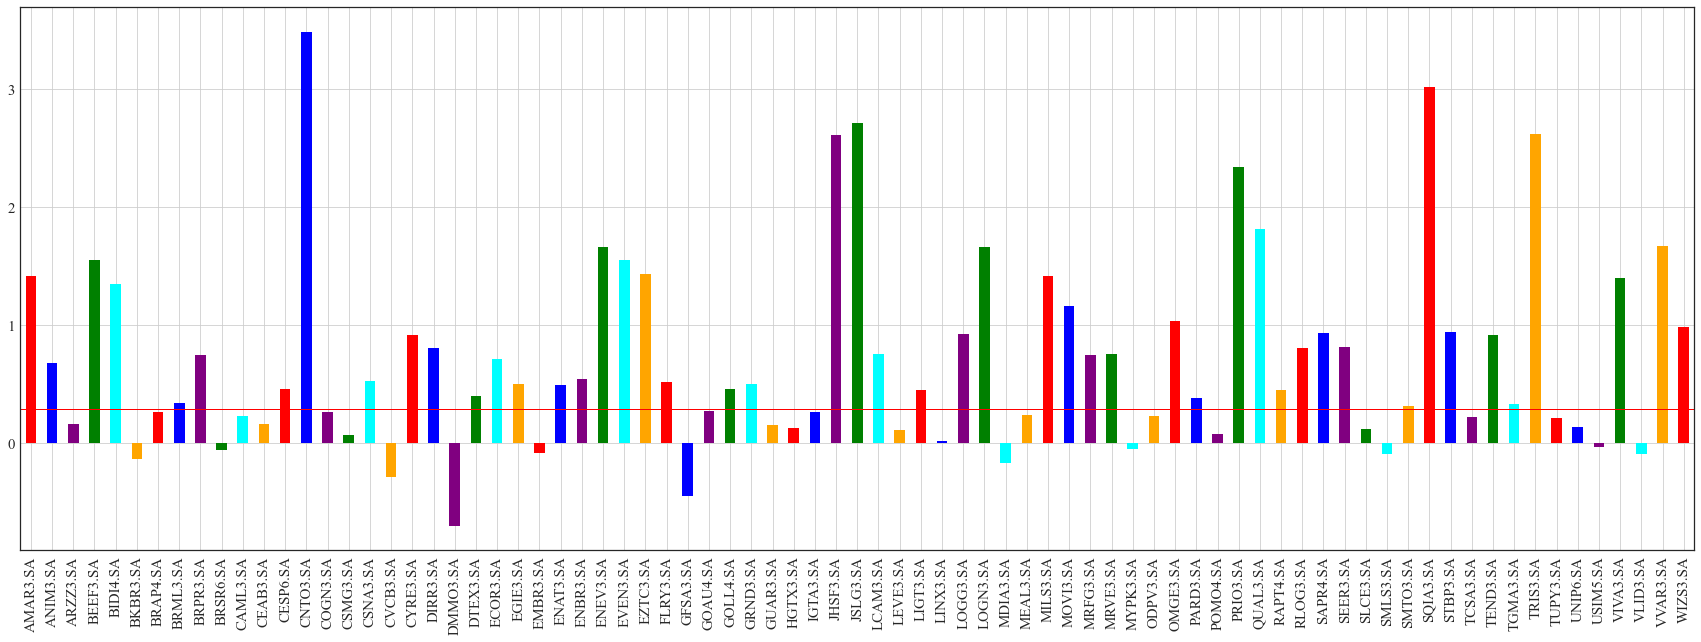

In [15]:
annual_returns.plot.bar(figsize=(30,10), color=['red','blue','purple', 'green', 'cyan', 'orange'], fontsize=15)
plt.axhline(y=bvsp_annual, color='r', linestyle='-')

## 2020 (SMALL CAPS)

In [16]:
# Coletando Dados de Preço 2019 (IBRX50)

stock_data = yf.download(small  , start='2019-12-30')['Close']
bvsp_data  = yf.download('^BVSP', start='2019-12-30')['Close']

stock_data.ffill(inplace=True)
bvsp_data.ffill(inplace=True)

[*********************100%***********************]  79 of 79 completed
[*********************100%***********************]  1 of 1 completed


In [17]:
# Calculo dos Retornos

stock_returns  = np.log(stock_data).shift(-1) - np.log(stock_data)
bvsp_returns   = np.log(bvsp_data).shift(-1) - np.log(bvsp_data)
annual_returns = ((1+np.mean(stock_returns))**90)-1
bvsp_annual    = ((1+np.mean(bvsp_returns)) **100)-1

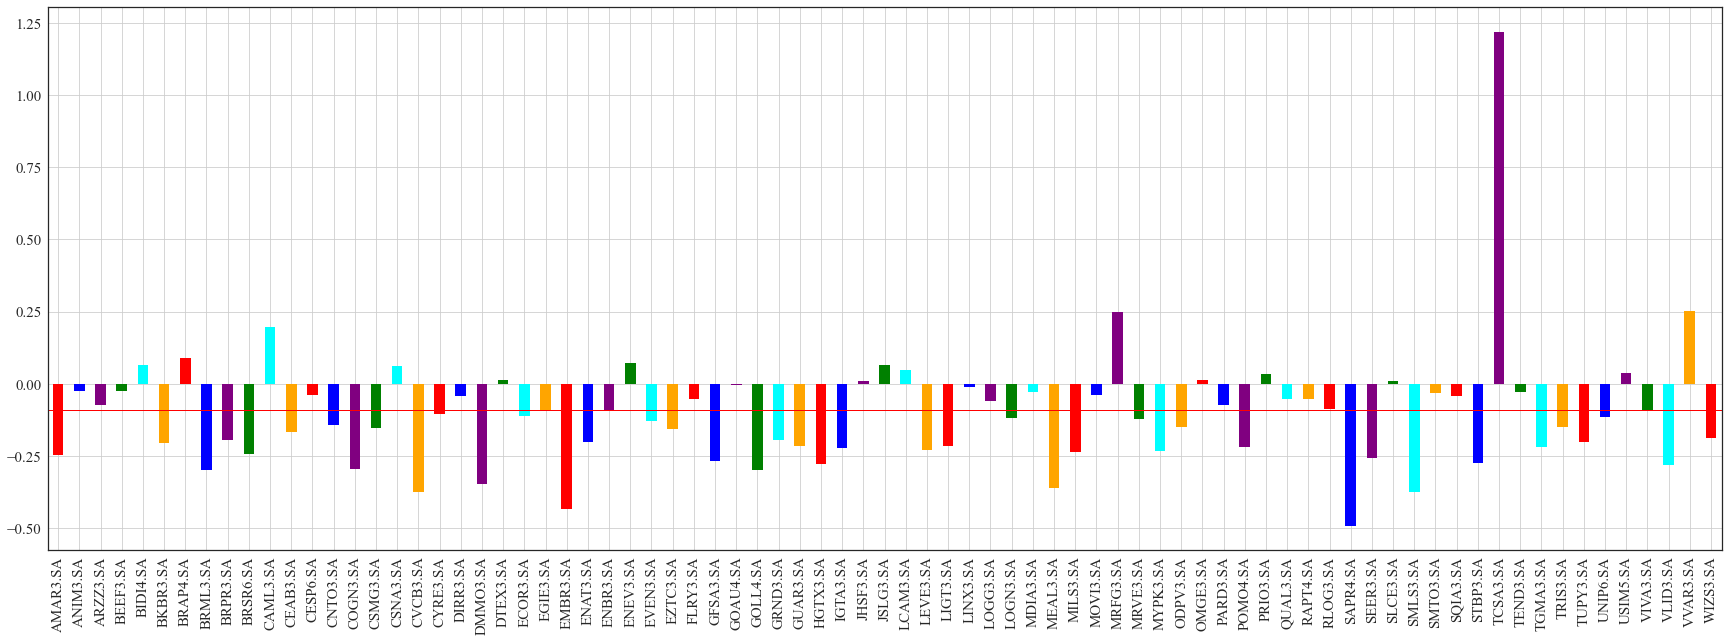

In [18]:
annual_returns.plot.bar(figsize=(30,10), color=['red','blue','purple', 'green', 'cyan', 'orange'], fontsize=15)
plt.axhline(y=bvsp_annual, color='r', linestyle='-')

# Análise de Concorrência

In [41]:
varejo           = ['BTOW3.SA', 'CNTO3.SA', 'MGLU3.SA', 'VVAR3.SA']
energia          = ['EGIE3.SA', 'ELET3.SA', 'EQTL3.SA', 'OMGE3.SA']
saude            = ['FLRY3.SA', 'GNDI3.SA', 'HAPV3.SA', 'PARD3.SA', 'RADL3.SA', 'SMTO3.SA']
logist           = ['LOGG3.SA', 'RAIL3.SA', 'RLOG3.SA']
sem_concorrencia = ['B3SA3.SA', 'BPAC11.SA', 'JBSS3.SA', 'PRIO3.SA', 'RENT3.SA', 'SBSP3.SA', 'TEND3.SA', 'WEGE3.SA'] 

[*********************100%***********************]  4 of 4 completed


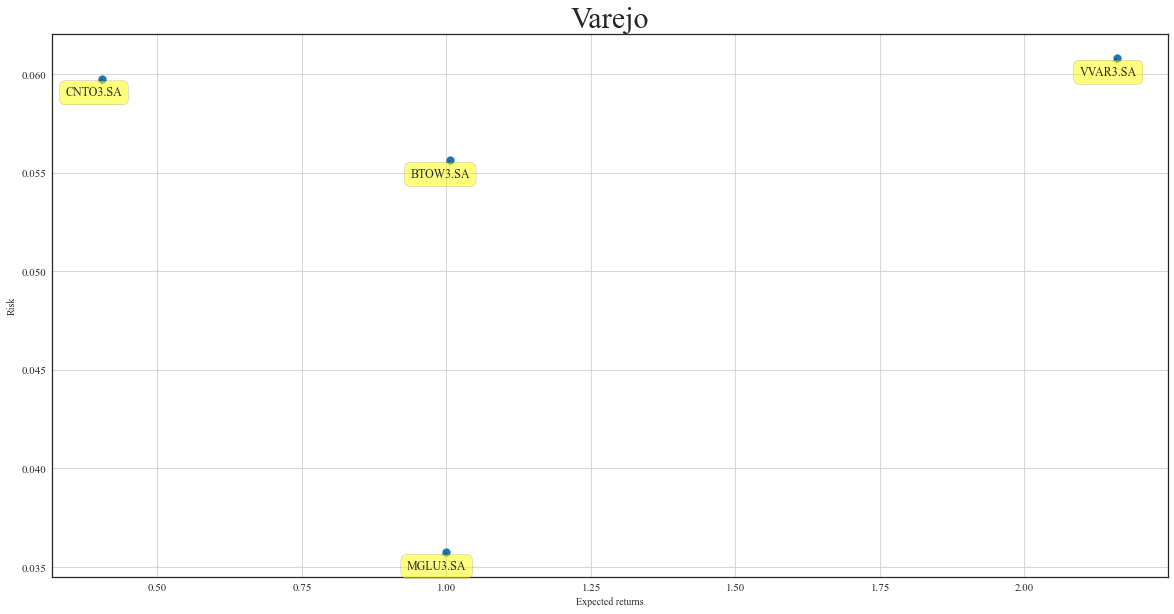

In [42]:
stock_data     = yf.download(varejo, start='2020-03-24')['Close']
stock_returns  = np.log(stock_data).shift(-1) - np.log(stock_data)

plt.subplots(figsize=(20,10))
plt.title('Varejo', fontsize=30)
plt.scatter(((1+np.mean(stock_returns))**70)-1, stock_returns.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(stock_returns.columns, ((1+np.mean(stock_returns))**70)-1, stock_returns.std()):
    plt.annotate(label, 
                 xy = (x, y), xytext = (20, -20),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

[*********************100%***********************]  4 of 4 completed


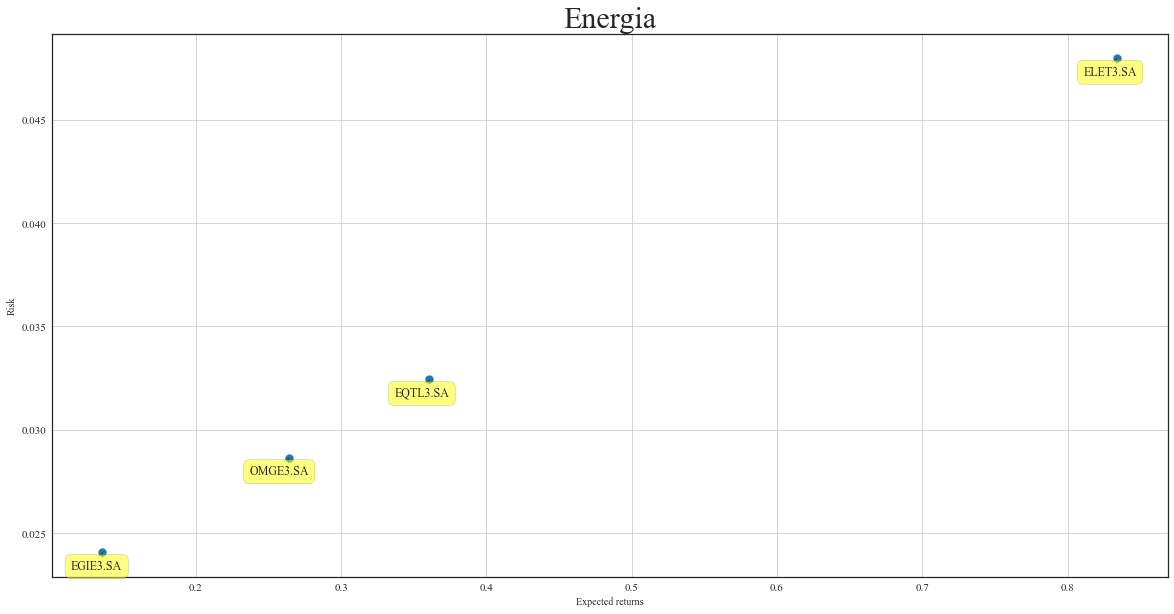

In [43]:
stock_data     = yf.download(energia, start='2020-03-24')['Close']
stock_returns  = np.log(stock_data).shift(-1) - np.log(stock_data)

plt.subplots(figsize=(20,10))
plt.title('Energia', fontsize=30)
plt.scatter(((1+np.mean(stock_returns))**70)-1, stock_returns.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(stock_returns.columns, ((1+np.mean(stock_returns))**70)-1, stock_returns.std()):
    plt.annotate(label, 
                 xy = (x, y), xytext = (20, -20),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

[*********************100%***********************]  6 of 6 completed


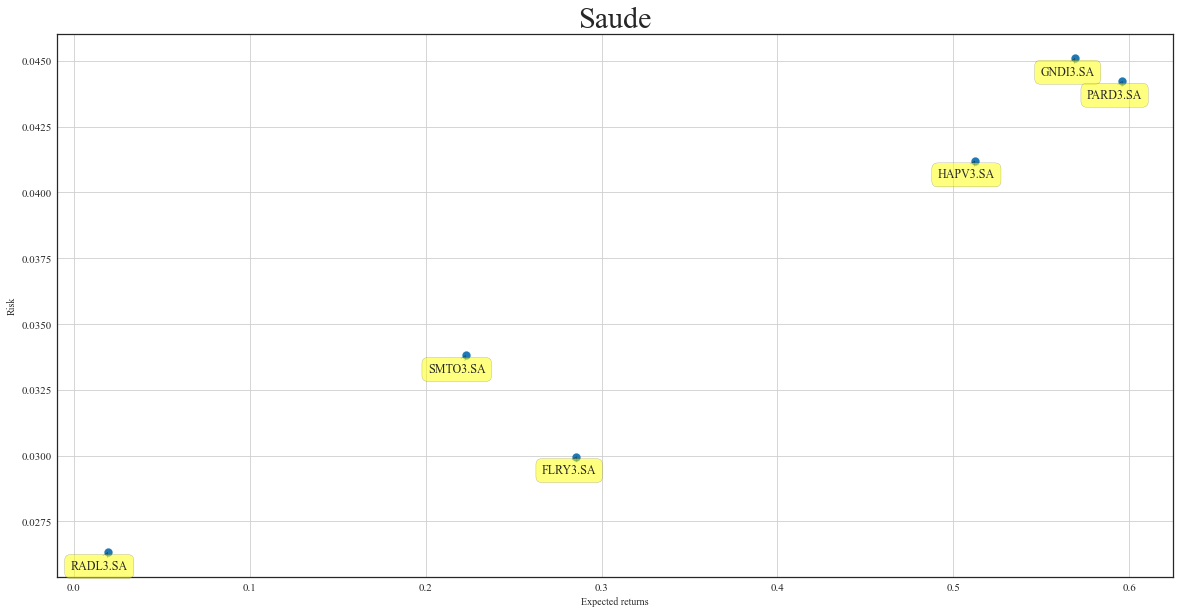

In [44]:
stock_data     = yf.download(saude, start='2020-03-24')['Close']
stock_returns  = np.log(stock_data).shift(-1) - np.log(stock_data)

plt.subplots(figsize=(20,10))
plt.title('Saude', fontsize=30)
plt.scatter(((1+np.mean(stock_returns))**70)-1, stock_returns.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(stock_returns.columns, ((1+np.mean(stock_returns))**70)-1, stock_returns.std()):
    plt.annotate(label, 
                 xy = (x, y), xytext = (20, -20),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

[*********************100%***********************]  3 of 3 completed


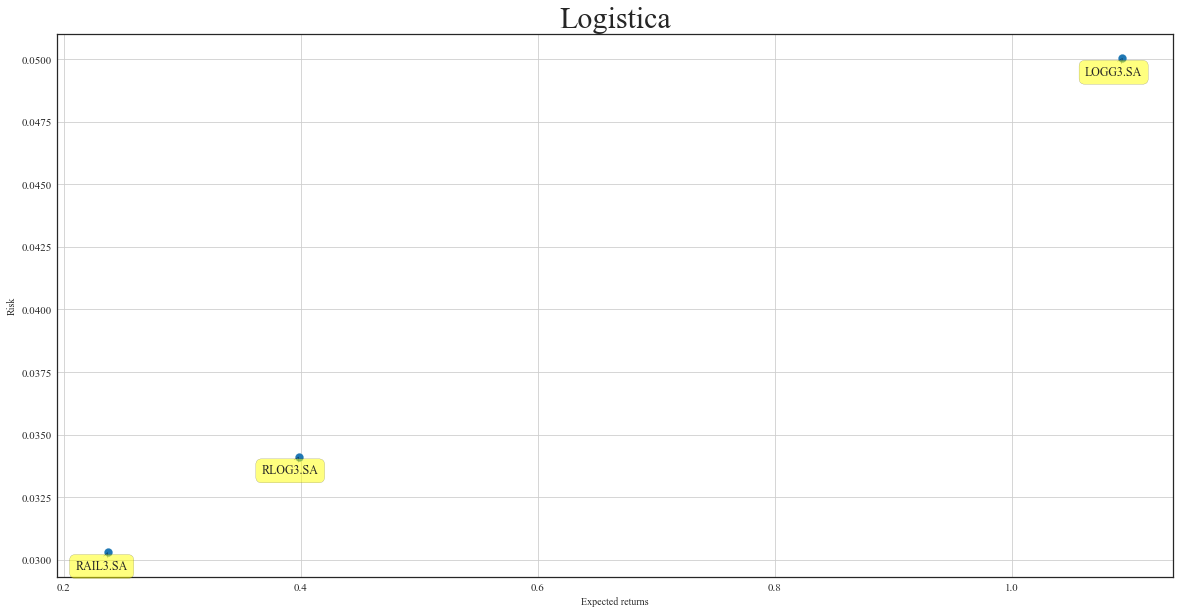

In [45]:
stock_data     = yf.download(logist, start='2020-03-24')['Close']
stock_returns  = np.log(stock_data).shift(-1) - np.log(stock_data)

plt.subplots(figsize=(20,10))
plt.title('Logistica', fontsize=30)
plt.scatter(((1+np.mean(stock_returns))**70)-1, stock_returns.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(stock_returns.columns, ((1+np.mean(stock_returns))**70)-1, stock_returns.std()):
    plt.annotate(label, 
                 xy = (x, y), xytext = (20, -20),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

[*********************100%***********************]  8 of 8 completed


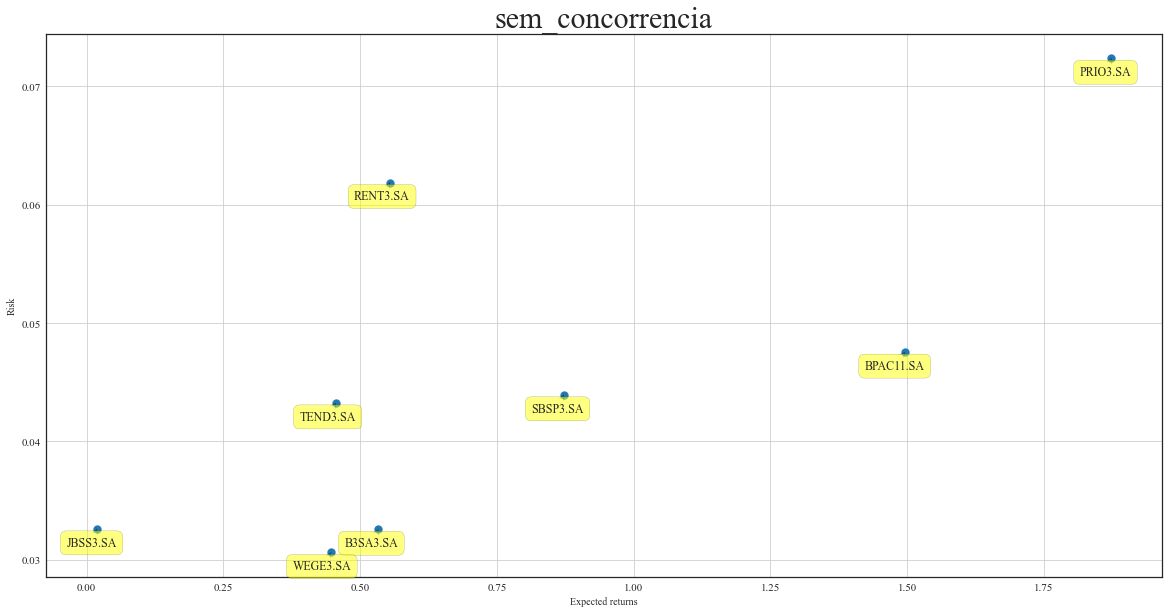

In [46]:
stock_data     = yf.download(sem_concorrencia, start='2020-03-24')['Close']
stock_returns  = np.log(stock_data).shift(-1) - np.log(stock_data)

plt.subplots(figsize=(20,10))
plt.title('sem_concorrencia', fontsize=30)
plt.scatter(((1+np.mean(stock_returns))**70)-1, stock_returns.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(stock_returns.columns, ((1+np.mean(stock_returns))**70)-1, stock_returns.std()):
    plt.annotate(label, 
                 xy = (x, y), xytext = (20, -20),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

[*********************100%***********************]  9 of 9 completed


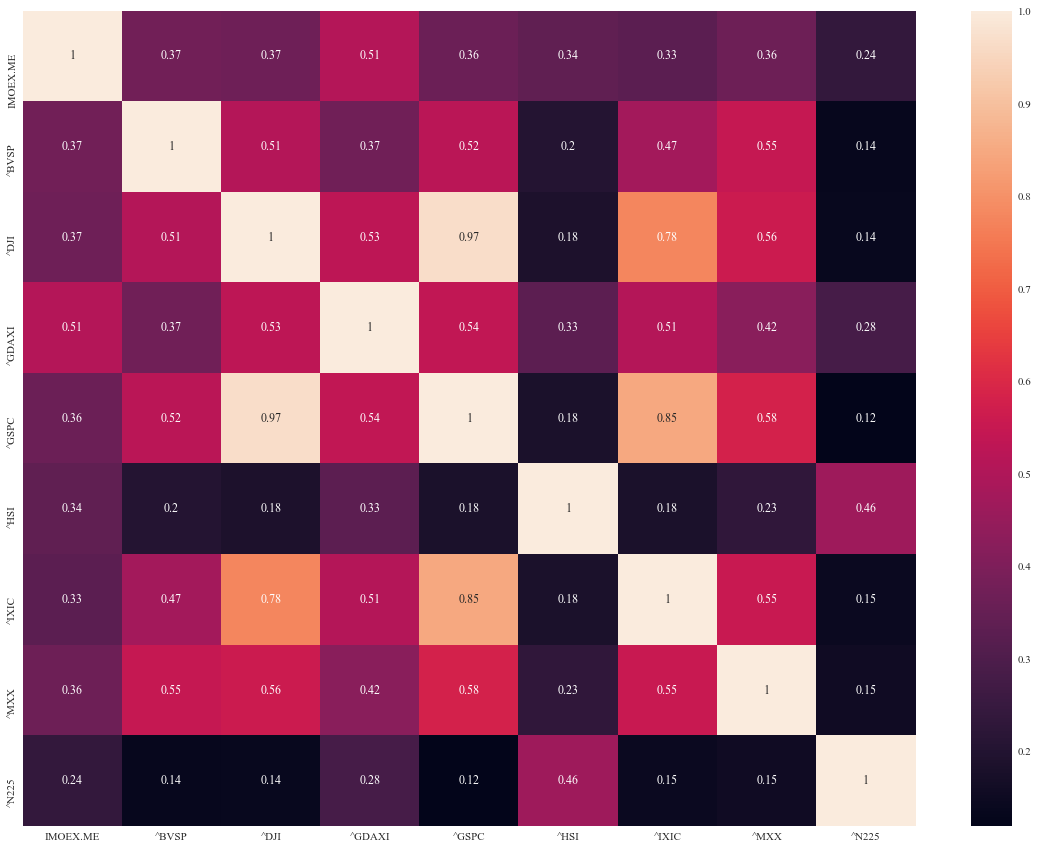

In [7]:
stock_data     = yf.download('^BVSP ^DJI ^GSPC ^IXIC ^MXX ^N225 IMOEX.ME ^HSI ^GDAXI')['Close']
stock_returns  = np.log(stock_data).shift(-1) - np.log(stock_data)

plt.subplots(figsize=(20,15))
sns.heatmap(stock_returns.corr(), annot=True)

In [5]:
stock_data.head()

,^BVSP,^DJI
Date,,
1985-01-29,NaN,1292.619995
1985-01-30,NaN,1287.880005
1985-01-31,NaN,1286.770020
1985-02-01,NaN,1277.719971
1985-02-04,NaN,1290.079956
